1. GoogLeNet (параллельная обработка изображения фильтрами 1*1, 3*3, 5*5)

В сравнении с VGG сильно уменьшает количество параметров.

Обучалась на ImageNet (датасет с миллионом изображений, принадлежащих к 1000 классов)


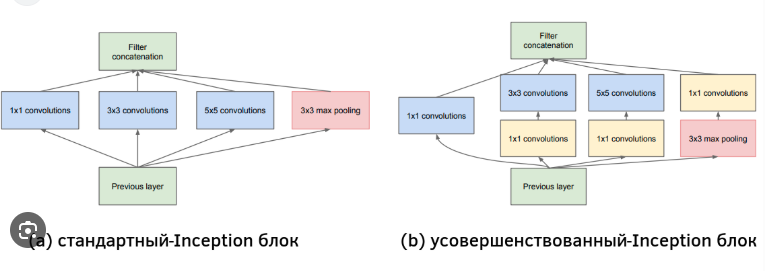

Почему появился усовершенствованный блок? Обычный предполагает сильное разрастание входных данных, умные конволюции в усовершенствованной не позволяют этому случиться.
Вообще основной плюс модели - возможность классифицировать объект, несмотря на его размер.

Вся архитектура GoogLeNet состоит из предварительных свёрточных слоёв, за которыми применяется 9 Inception-блоков (с разными весами)

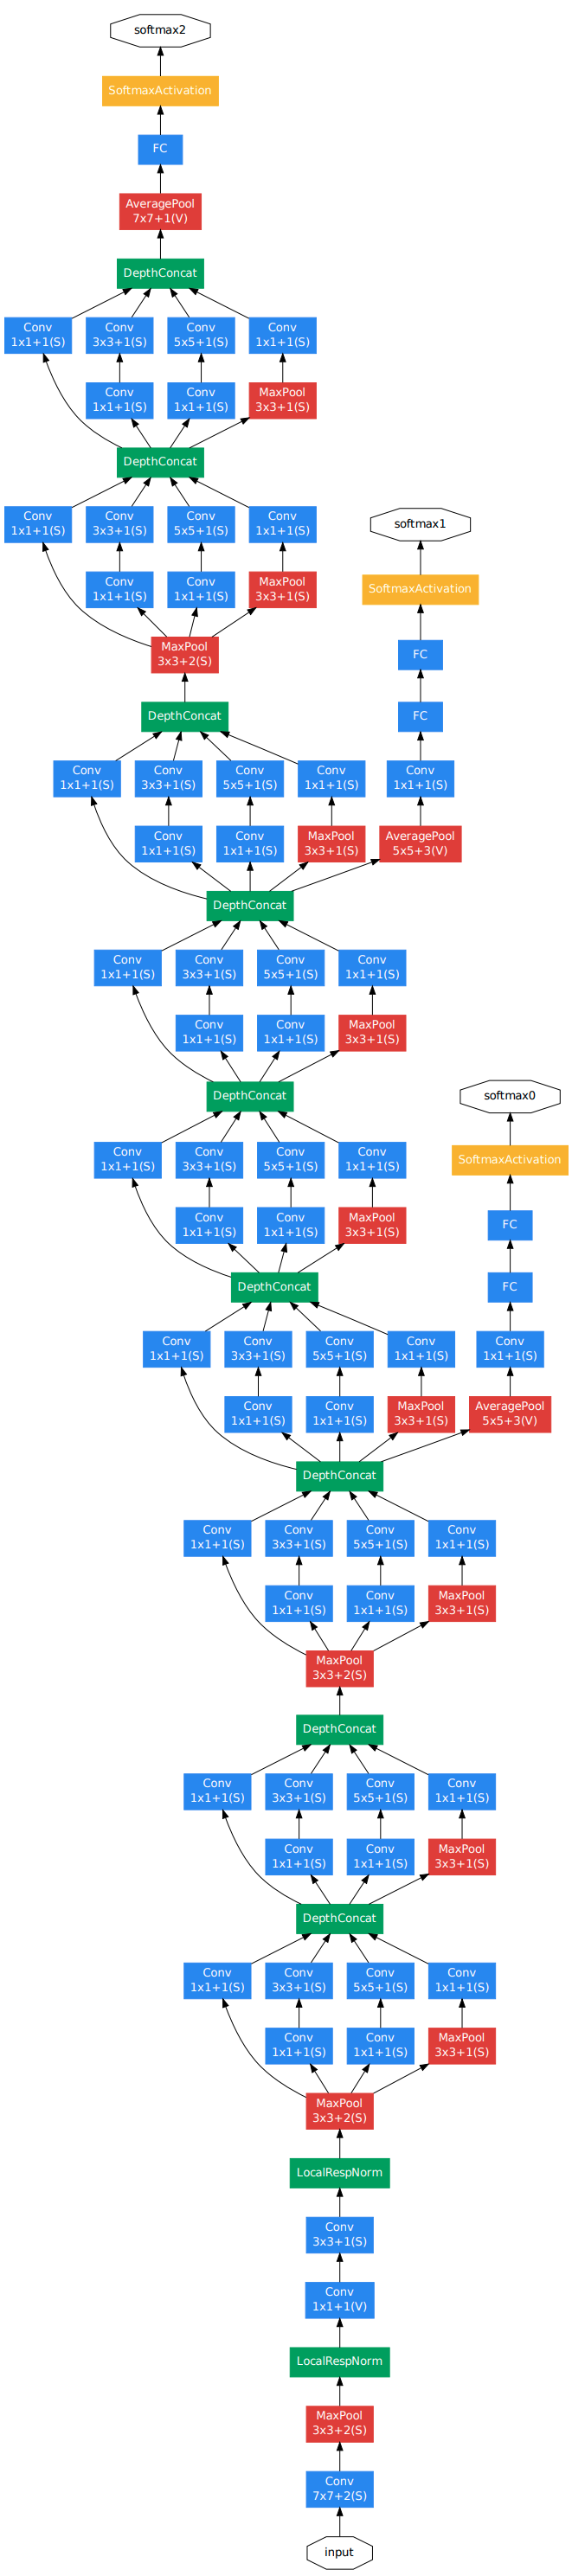

За счёт сильного снижения числа каналов свёртками 1x1, а также использования единственного полносвязного слоя, применённого к результату глобального усредняющего пулинга, число параметров GoogLeNet оказалось существенно ниже, чем в модели VGG, несмотря на возросшую глубину. Но GoogLeNet работает медленнее из-за увеличенного числа слоёв.

В Inception-блоке результаты действия свёрток объединяются с результатом максимизирующего пулинга 3x3. Это вызвано тем, что распознавать простые объекты оптимальнее меньшим количеством свёрток. Поэтому часть сигнала направляется через пулинг вместо его обработки последующими свёртками и операциями нелинейности. Этот** пулинг не приводит к уменьшению размерности**, поскольку применяется с шагом 1 (единичным stride).

Особенность обучения и применения


Обучение таких глубоких сетей, как GoogLeNet, сопряжено с практическими сложностями, вызванными нестабильным распространением градиента (vanishing gradient, exploding gradient) в методе обратного распространения ошибки, пока он доходит до более ранних слоёв.

По сути, это связано с тем, связь выхода сети с ранними слоями менее прямая и более опосредованная, чем с поздними, из-за чего ранние слои хуже настраиваются.

Поэтому авторы архитектуры во время обучения сети добавляли два вспомогательных классификатора в середину сети с выходами softmax0 и softmax1. Итоговая модель настраивалась на взвешенной сумме потерь всех трёх классификаторов softmax0, softmax1 и softmax2. Более ранние классификаторы позволили лучше обучить начальные слои сети. Во время применения сети вспомогательные классификаторы не использовались, и прогноз строился только по выходу softmaх2.

In [ ]:
import torch
import torchvision.models as models

# Загружаем GoogLeNet с весами, обученными на ImageNet
model = models.googlenet(pretrained=True)
model.eval()  # Переводим в режим оценки


In [ ]:
from torchvision import transforms # адаптация изображений под модель (она ожидает 224 на 224)
from PIL import Image

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

EfficientNet-B0 — этосамая маленькая и самая ресурсоэффективная модель в семействе сверточных нейронных сетей (CNN) EfficientNet, которые были представлены в 2019 году.

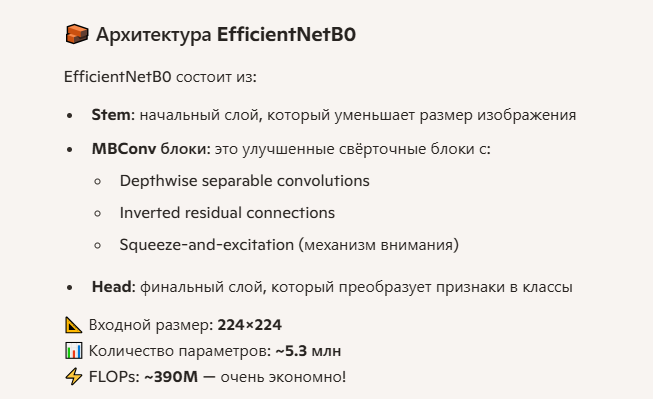

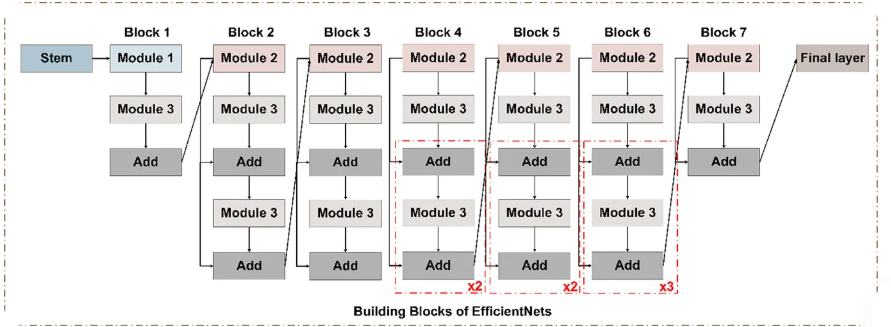


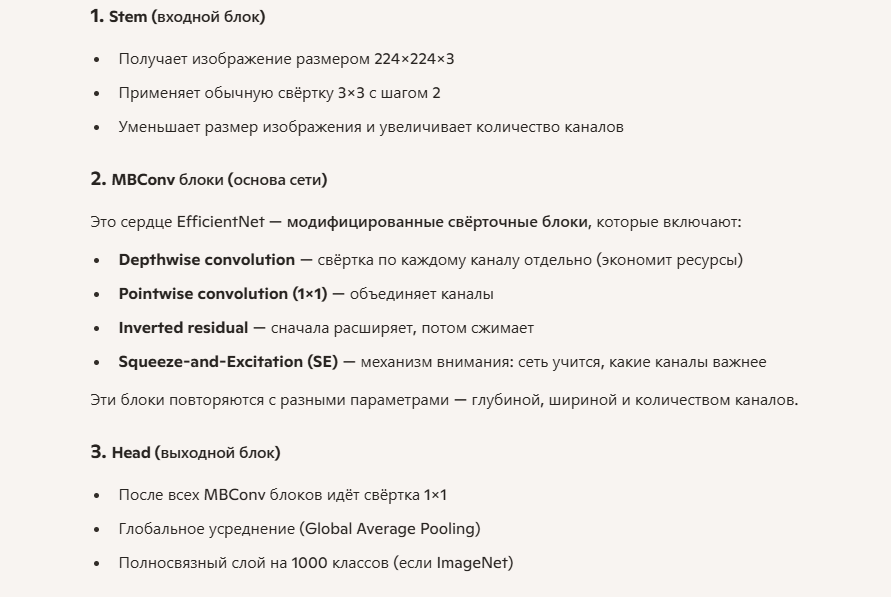

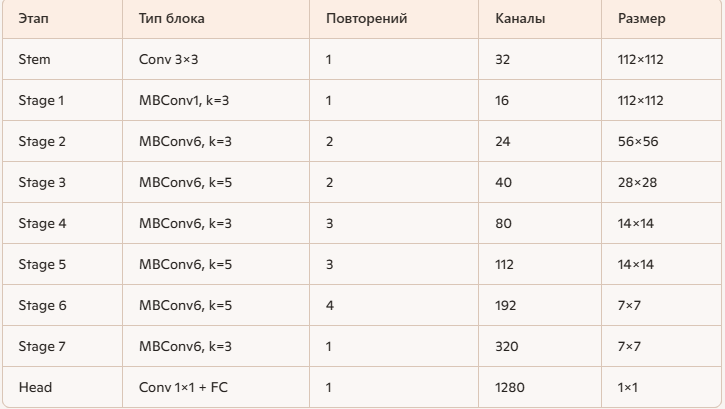